# Лабораторная работа 1  
## Планирование пути автономного агента в 2D-среде

## Постановка задачи

**Цель работы.**  
Реализовать простейшего агента автономной навигации в 2D-среде.  
Агент должен построить путь от начальной точки (Start) к целевой точке (Goal), обходя препятствия, используя алгоритм планирования пути A\*.


In [ ]:
import heapq
import math

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# cnst for card
GRID_FREE = 0   # free
GRID_OBST = 1   # obstacle

# ex of card 10x10
grid = np.zeros((10, 10), dtype=int)

# Add a "wall" of obstacles
grid[3, 1:8] = GRID_OBST

start = (0, 0)   # (row, col)
goal  = (9, 9)

grid


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
#heuristics + A*
def heuristic(a, b):
    """
    Эвристика для A* — манхэттенское расстояние между двумя клетками.
    a, b: кортежи (row, col)
    """
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def astar(grid, start, goal):
    """
    Реализация алгоритма A* на прямоугольной сетке.

    grid  : numpy-массив с 0 (свободно) и 1 (препятствие)
    start : кортеж (row, col)
    goal  : кортеж (row, col)

    Возвращает:
        список клеток пути от start до goal (включительно) или None, если путь не найден.
    """
    rows, cols = grid.shape

    def in_bounds(node):
        r, c = node
        return 0 <= r < rows and 0 <= c < cols

    def passable(node):
        r, c = node
        return grid[r, c] == GRID_FREE

    # 4-связность: вверх, вниз, вправо, влево
    neighbors4 = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    # Очередь с приоритетом: (f_score, g_score, node)
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), 0, start))

    came_from = {}          # для восстановления пути
    g_score = {start: 0}    # стоимость пути от старта до узла
    closed = set()          # уже обработанные узлы

    while open_set:
        f, g, current = heapq.heappop(open_set)

        if current in closed:
            continue

        # Цель достигнута — восстанавливаем путь
        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        closed.add(current)

        for dr, dc in neighbors4:
            neighbor = (current[0] + dr, current[1] + dc)

            if not in_bounds(neighbor) or not passable(neighbor):
                continue

            tentative_g = g_score[current] + 1  # here all the steps are of equal "price"

            if tentative_g < g_score.get(neighbor, math.inf):
                g_score[neighbor] = tentative_g
                came_from[neighbor] = current
                f_score = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score, tentative_g, neighbor))

    # path not found
    return None


In [ ]:
#visualization
def plot_grid_with_path(grid, path=None, start=None, goal=None):
    """
    Простая визуализация: карта + (по желанию) путь, старт и цель.
    """
    rows, cols = grid.shape
    fig, ax = plt.subplots(figsize=(5, 5))

    # 0/1-карта: препятствия будут яркими, свободные клетки тёмными
    im = ax.imshow(grid, origin='upper')

    if path is not None:
        ys = [p[0] for p in path]
        xs = [p[1] for p in path]
        ax.plot(xs, ys, linewidth=2)

    if start is not None:
        ax.scatter(start[1], start[0], marker='o', s=80, label='Start')
    if goal is not None:
        ax.scatter(goal[1], goal[0], marker='x', s=80, label='Goal')

    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(loc='upper right')

    plt.show()


Найденный путь: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
Длина пути: 19


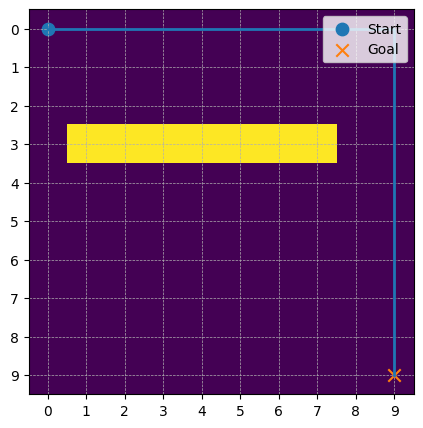

In [ ]:
#runing algo and  showing path
path = astar(grid, start, goal)

print("Найденный путь:", path)
print("Длина пути:", len(path) if path is not None else None)

plot_grid_with_path(grid, path, start, goal)


Найденный путь (карта 2): [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 7), (7, 6)]
Длина пути: 16


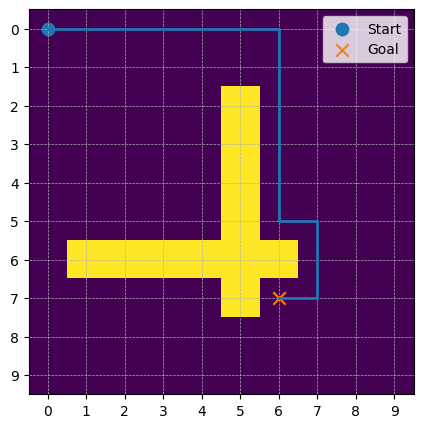

In [ ]:
# Вторая карта: другая конфигурация препятствий
grid2 = np.zeros((10, 10), dtype=int)
grid2[2:8, 5] = GRID_OBST
grid2[6, 1:7] = GRID_OBST

start2 = (0, 0)
goal2  = (7, 6)

path2 = astar(grid2, start2, goal2)

print("Найденный путь (карта 2):", path2)
print("Длина пути:", len(path2) if path2 is not None else None)

plot_grid_with_path(grid2, path2, start2, goal2)
